## Regressão de cristas ou cumeeira para superar falhas na regressão linear

Este é útil quando um conjunto de dados tem vetores colineares.

> Regressão de cristas é muito boa na presença de colinearidade que possa ser modelada em características polinomiais: vetores $x,x^2,x^3,...,x^n$ que saõ altamente colineares e correlacionados

1. Usar `make_regression`para criar conjunto de dados simples com três fatores de previsão, e `effective_rank` = 2. Effective rank significa que, que a matriz é de ordem completa, muitas das colunas têm alto grau de colinearidade

In [2]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

2. Ver a regressão linear com boostrapping

In [3]:
import numpy as np
n_boostrap = 1000
len_data = len(reg_data)
subsample_size = np.int64(0.5 * len_data)
subsample = lambda:np.random.choice(np.arange(0,len_data), size=subsample_size)

In [4]:
coefs = np.ones((n_boostrap,3))

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
for i in range(n_boostrap):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i][0] = lr.coef_[0]
    coefs[i][1] = lr.coef_[1]
    coefs[i][2] = lr.coef_[2]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

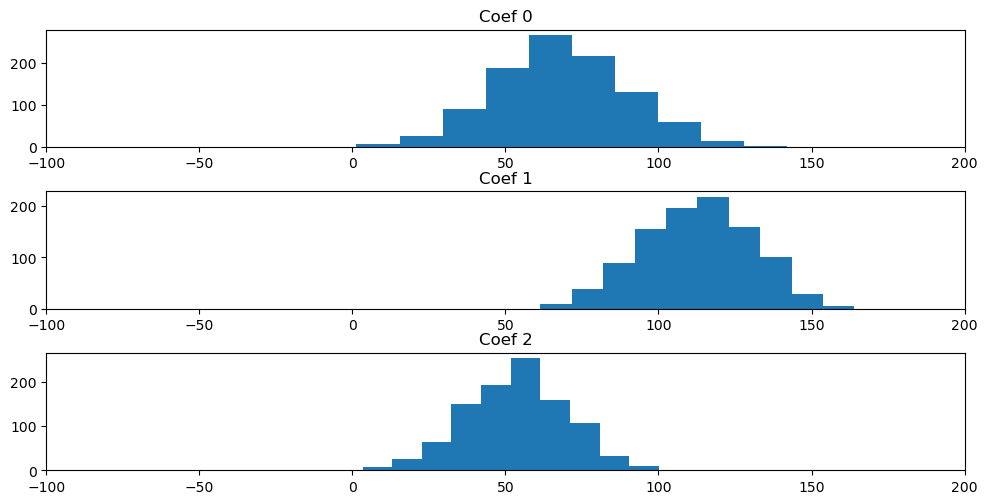

In [41]:
f, ax = plt.subplots(figsize=(10,5), nrows=3)
f.tight_layout()
min, max = -100, 200
ax[0].hist(coefs[:,0], bins=10)
ax[0].set_title("Coef 0")
ax[0].set_xlim(min, max)

ax[1].hist(coefs[:,1], bins=10)
ax[1].set_title("Coef 1")
ax[1].set_xlim(min, max)

ax[2].hist(coefs[:,2], bins=10)
ax[2].set_title("Coef 2")
ax[2].set_xlim(min, max)
plt.show()

4. Faça a mesmo processo com a regressão de cristas

In [36]:
from sklearn.linear_model import Ridge

In [37]:
r = Ridge()
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int64(0.5 * len_data)
subsample = lambda:np.random.choice(np.arange(0,len_data), size=subsample_size)

In [38]:
coefs_r = np.ones((n_bootstraps, 3))
for i in  range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i][0] = r.coef_[0]
    coefs_r[i][1] = r.coef_[1]
    coefs_r[i][2] = r.coef_[2]

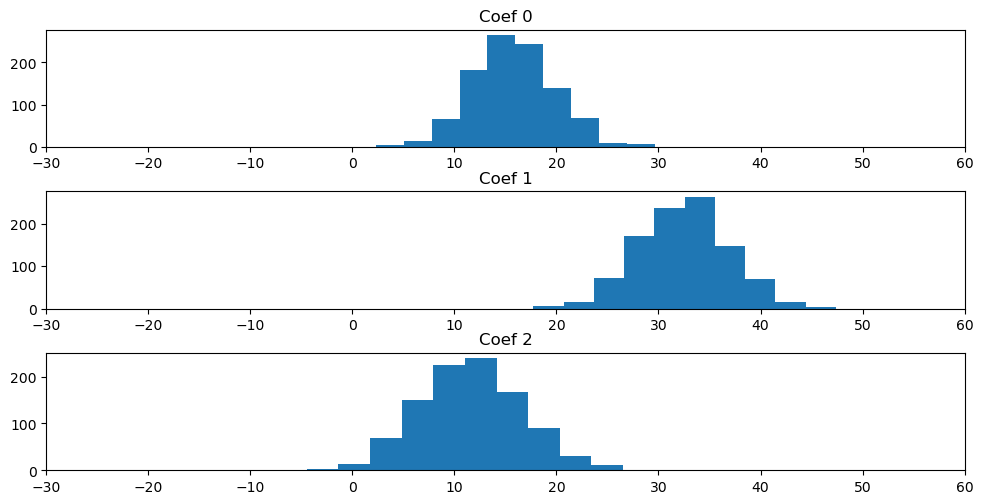

In [40]:
f, ax = plt.subplots(figsize=(10,5), nrows=3)
f.tight_layout()
min, max = -30,60
ax[0].hist(coefs_r[:,0], bins=10)
ax[0].set_title("Coef 0")
ax[0].set_xlim(min, max)

ax[1].hist(coefs_r[:,1], bins=10)
ax[1].set_title("Coef 1")
ax[1].set_xlim(min, max)

ax[2].hist(coefs_r[:,2], bins=10)
ax[2].set_title("Coef 2")
ax[2].set_xlim(min, max)
plt.show()

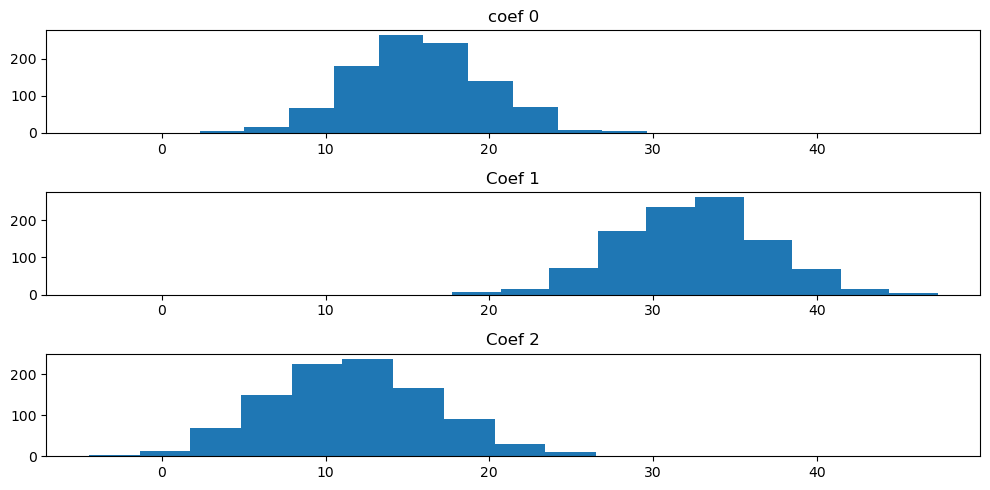

In [45]:
# outra forma de plotar gráficos, mas chega no mesmo resultado
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311, title="coef 0")
ax1.hist(coefs_r[:,0])


ax2 = plt.subplot(312, sharex=ax1, title="Coef 1")
ax2.hist(coefs_r[:,1])

ax3 = plt.subplot(313, sharex=ax1, title= "Coef 2")
ax3.hist(coefs_r[:,2])

plt.tight_layout()
plt.show()

Agora os coeficientes fazendo a regressão de cristas, estão mais próximos de zero.

5. Veja a disperção média entre os coeficientes na regressão linear

In [46]:
np.var(coefs, axis=0)

array([466.67015107, 320.92240893, 261.22354401])

6. veja a disperção média entre os coeficientes na regressão de cristas

In [47]:
np.var(coefs_r, axis=0)

array([16.10345854, 20.00448291, 24.36421672])

## Otimizando a regressão de cristas

Atravéz de validação cruzada, será afinado o parâmetro alpha da regressão de cumeeira, no scikit-learn o parâmetro gamma é representado por alpha ao usar `RidgeRegression`

In [48]:
from sklearn.datasets import make_regression

In [49]:
reg_data, reg_target = make_regression(n_samples=100, n_features=2, effective_rank=1, noise=10)

## Como fazer

No módulo `linear_models`, há um objeto chamado de `RidgeCV` (Ridge cross-validation), desempenha um validação similar ao leave-one-out cross-validation (LOOCV)

1. este irá treinar o modelo para todoso os exemplos, exceto um. 

In [50]:
from sklearn.linear_model import RidgeCV

In [51]:
rcv = RidgeCV(alphas=np.array([.1,.2,.3,.4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4]))

2. Depois de ajustar a regressão, o atributo alphas será o a melhor escolha

In [52]:
rcv.alpha_

0.1

3. mudando um pouco o alphas por volta de .1

In [53]:
rcv2 = RidgeCV(alphas=np.array([.07,.08,.09,.1,.11]))

In [54]:
rcv2.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.07, 0.08, 0.09, 0.1 , 0.11]))

In [55]:
rcv2.alpha_

0.07

## Como funciona

